1. [Creating a base code](#section_1)
2. [DC Readouts](#section_2)
3. [Optimizing the PRCL parameters](#section_3)
4. [Optimizing the Schnupp Asymmetry](#section_4)
5. [Optimized lengths](#section_5)
6. [Problem_1](#section_6)
7. [Optimizing the Reflectance](#section_7)
8. [Problem_2](#section_8)

<a name="section_1"></a>
# Creating a base code

In [1]:
import finesse
import numpy as np
import matplotlib.pyplot as plt

finesse.configure(plotting=True)
prmi=finesse.Model()
prmi.parse("""
#Laser
l laser P=1
s s0 laser.p1 eom.p1 L=1

#EOMS
mod eom midx=0.3 f=45497355 order=1                      #Phase modulating the laser @ 454497355Hz
s s2 eom.p2 Fi.p1 L=1

#Faraday isolator
dbs Fi
s s3 Fi.p3 prmar.p1 L=0

#PRM

m prmar R=0 L=4e-5 Rc=11.009
s sprmarpr prmar.p2 PRM.p1 L=0.0737 nr=1.4496 
m PRM L=8.5e-06 T=0.03
s sPRBS PRM.p2 BS.p1 L=0                                 #Initially set as zero

#Beam Splitter
bs BS R=0.5 L=3.75e-05 alpha=45 
s sBSAR1 BS.p3 BSAR1.p1 L=0.0687 nr=1.4496
bs BSAR1 R=5e-5 L=0 phi=0 alpha=-29.195
s sBSAR2 BS.p4 BSAR2.p1 L=0.0687 nr=1.4496
bs BSAR2 R=5e-5 L=0 phi=0 alpha=29.195


#ITMx
s michx BSAR1.p3 ITMxAR.p1 L=0                           #Initially set as zero
m ITMxAR R=0 L=2e-5
s sITMxARITM ITMxAR.p2 ITMx.p1 L=0.2 nr=1.4496
m ITMx L=3.75e-05 T=0.014 Rc=-1934

#ITMy
s michy BS.p2 ITMyAR.p1 L=0                              #Initially set as zero
m ITMyAR R=0 L=2e-5
s sITMyARITM ITMyAR.p2 ITMy.p1 L=0.2 nr=1.4496
m ITMy L=3.75e-05 T=0.014 Rc=-1934

#Photo detectors

pd AS_dc BS.p4.o
pd POP_dc PRM.p2.o
pd REFL_dc PRM.p1.o
pd ArmTrans_dc ITMy.p2.o

#Amplitude detectors

ad BS_f0 BS.p1.o f=0
ad BS_f2 BS.p1.o f=45497355
ad AS_f0 BSAR2.p3.o f=0
#ad AS_f1 BS.p4.o f=9099471
ad AS_f2 BS.p4.o f=45497355
ad POP_f0 PRM.p2.o f=0
#ad POP_f1 PRM.p2.o f=9099471
ad POP_f2 PRM.p2.o f=45497355

pd1 REFLf1I PRM.p1.o f=45497355 phase=0
pd1 REFLf1Q PRM.p1.o f=45497355 phase=90

pd1 ASf1I BS.p4.o f=45497355 phase=0
pd1 ASf1Q BS.p4.o f=45497355 phase=90

#Sweeping the ITMy mirror

xaxis(ITMy.phi,lin,-200,200,10000)
""")

<a name="section_2"></a>
## Plotting the DC Power readouts at POP, AS, REFL, Arm Transmission ports

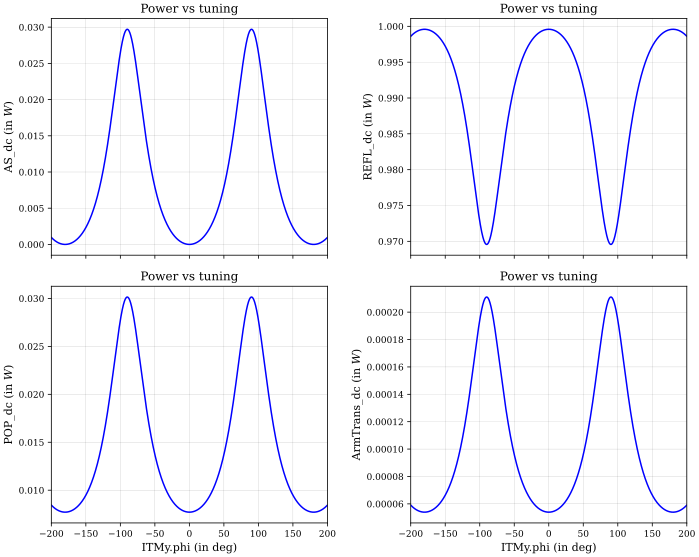

In [2]:
out=prmi.run()
AS_dc=[]
ArmTrans_dc=[]
POP_dc=[]
REFL_dc=[]

phi=np.linspace(-200,200,10000)
for i in range(10000):
    AS_dc.append(out["AS_dc"][i])
    POP_dc.append(out["POP_dc"][i])
    REFL_dc.append(out["REFL_dc"][i])
    ArmTrans_dc.append(out["ArmTrans_dc"][i])
    
fig,plots=plt.subplots(2,2,figsize=(10,8),sharex=True)

plots[0,0].plot(phi,AS_dc)
plots[0,0].set_ylabel("AS_dc (in $W$)")
plots[0,0].set_title("Power vs tuning")

plots[1,0].plot(phi,POP_dc)
plots[1,0].set_ylabel("POP_dc (in $W$)")
plots[1,0].set_title("Power vs tuning")
plots[1,0].set_xlabel("ITMy.phi (in deg)") 

plots[0,1].plot(phi,REFL_dc)
plots[0,1].set_ylabel("REFL_dc (in $W$)")
plots[0,1].set_title("Power vs tuning")

plots[1,1].plot(phi,ArmTrans_dc)
plots[1,1].set_ylabel("ArmTrans_dc (in $W$)")
plots[1,1].set_title("Power vs tuning")
plots[1,1].set_xlabel("ITMy.phi (in deg)")

fig.tight_layout()    

<a name="section_3"></a>
## Sweeping the PRM to plot the DC readouts. I also locate the peaks of the carrier and sideband amplitudes in the PRC.

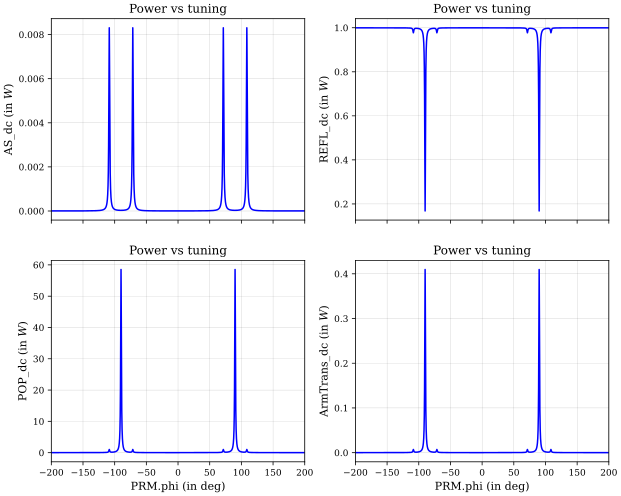

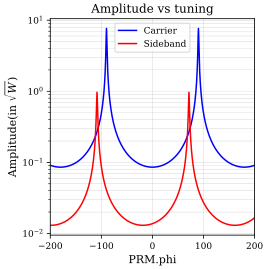

In [3]:
prmi.parse("xaxis(PRM.phi,lin,-200,200,10000)")
out=prmi.run()
AS_dc=[]
ArmTrans_dc=[]
POP_dc=[]
REFL_dc=[]
POP_f0=[]
POP_f2=[]

phi=np.linspace(-200,200,10000)
for i in range(10000):
    AS_dc.append(out["AS_dc"][i])
    POP_dc.append(out["POP_dc"][i])
    REFL_dc.append(out["REFL_dc"][i])
    ArmTrans_dc.append(out["ArmTrans_dc"][i])
    POP_f0.append(abs(out["POP_f0"][i]))
    POP_f2.append(abs(out["POP_f2"][i]))
    
fig,plots=plt.subplots(2,2,figsize=(10,8),sharex=True)

plots[0,0].plot(phi,AS_dc)
plots[0,0].set_ylabel("AS_dc (in $W$)")
plots[0,0].set_title("Power vs tuning")

plots[1,0].plot(phi,POP_dc)
plots[1,0].set_ylabel("POP_dc (in $W$)")
plots[1,0].set_title("Power vs tuning")
plots[1,0].set_xlabel("PRM.phi (in deg)")

plots[0,1].plot(phi,REFL_dc)
plots[0,1].set_ylabel("REFL_dc (in $W$)")
plots[0,1].set_title("Power vs tuning")

plots[1,1].plot(phi,ArmTrans_dc)
plots[1,1].set_ylabel("ArmTrans_dc (in $W$)")
plots[1,1].set_title("Power vs tuning")
plots[1,1].set_xlabel("PRM.phi (in deg)")

fig,a=plt.subplots(1,figsize=(4,4))
a.semilogy(phi,POP_f0,label="Carrier")
a.semilogy(phi,POP_f2,label="Sideband")
a.set_xlabel("PRM.phi")
a.set_ylabel("Amplitude(in $\sqrt{W}$)")
a.set_title("Amplitude vs tuning")
a.legend(loc="best")

fig.tight_layout()

Now, I set random PRC lengths to see how these peaks are shifted.<br>
I then optimize these parameters to resonate the sideband in the PRC.

SB attains peak amplitudes at PRM.phi: [-32.94329433 147.07470747]


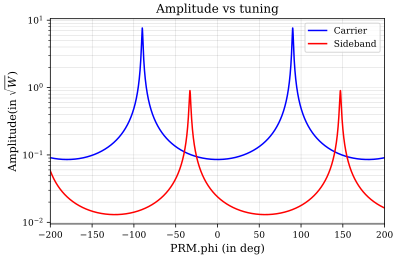

In [4]:
### Setting random PRCL parameters.
prmi.michy.L=4.49
prmi.michx.L=4.51 ### The mich lengths have a randomly set Schnupp of 0.01m, which is optimized separately.
prmi.sPRBS.L=4
prmi.parse("xaxis(PRM.phi,lin,-200,200,10000)")
out=prmi.run()

POP_f0=[]
POP_f2=[]
AS_f0=[]
AS_f2=[]

phi=np.linspace(-200,200,10000)
for i in range(10000):
    AS_f0.append(abs(out["AS_f0"][i]))
    AS_f2.append(abs(out["AS_f2"][i]))
    POP_f0.append(abs(out["POP_f0"][i]))
    POP_f2.append(abs(out["POP_f2"][i]))

fig.tight_layout()    
plt.semilogy(phi,POP_f0,label="Carrier")
plt.semilogy(phi,POP_f2,label="Sideband")
plt.xlabel("PRM.phi (in deg)")
plt.ylabel("Amplitude(in $\sqrt{W}$)")
plt.title("Amplitude vs tuning")
plt.legend(loc="best")

### The f2 Sideband is not resonant for these randomly set length parameters.

### We now locate the amplitude peaks.

import scipy
from scipy import signal
sb_peaks,_=signal.find_peaks(POP_f2)
print("SB attains peak amplitudes at PRM.phi:",phi[sb_peaks])

In the following cell, I find the length corresponding to the one of the two PRM.phi, that were located in the previous cell.<br>
We will bring the peak of SB to the zero coordinate of PRM (Carrier is already anti-resonant)

PR-BS length:  6.6938325585217555 m


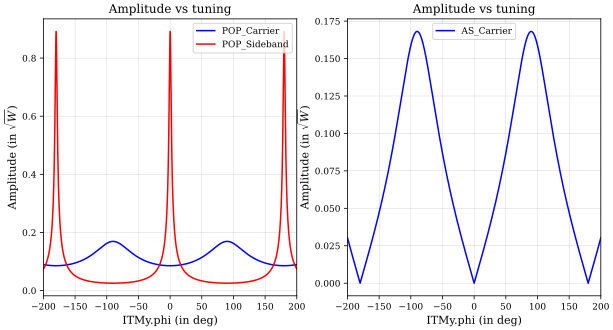

In [5]:
Lambda=3E8/45497355
prmi.sPRBS.L=4+Lambda*phi[sb_peaks[1]]/360 ### 4 was the initial PR-BS distance.
prmi.parse("xaxis(ITMy.phi,lin,-200,200,10000)") 
prmi.run()
out=prmi.run()

POP_f0=[]
POP_f2=[]
AS_f0=[]
AS_f2=[]

phi=np.linspace(-200,200,10000)
for i in range(10000):
    POP_f0.append(abs(out["POP_f0"][i]))
    POP_f2.append(abs(out["POP_f2"][i]))
    AS_f0.append(abs(out["AS_f0"][i]))
    AS_f2.append(abs(out["AS_f2"][i]))    

fig,a=plt.subplots(1,2,figsize=(10,5))
a[0].plot(phi,POP_f0,label="POP_Carrier")
a[0].plot(phi,POP_f2,label="POP_Sideband")
a[0].set_xlabel("ITMy.phi (in deg)")
a[0].set_ylabel("Amplitude (in $\sqrt{W}$)")
a[0].set_title("Amplitude vs tuning")
a[0].legend(loc="best")

a[1].plot(phi,AS_f0,label="AS_Carrier")
a[1].set_xlabel("ITMy.phi (in deg)")
a[1].set_ylabel("Amplitude (in $\sqrt{W}$)")
a[1].set_title("Amplitude vs tuning")
a[1].legend(loc="best")
print("PR-BS length: ",prmi.sPRBS.L)

The SB is resonant in the PRC while the carrier is anti-resonant.

<a name="section_4"></a>
## Optimizing the Schnupp asymmetry to maximize the transmission to the AS Port

In [6]:
### Optimizing the randomly chosen Schnupp asymmetry of 0.01 m, We will define a function, which can alter the Michx and Michy 
### lengths. We optimize it by minimizing the negative of the function output!
def f(del_l):
    prmi.michx.L=4.51+del_l
    prmi.michy.L=4.49-del_l
    out=prmi.run()
    AS_f2=[]
    for i in range(10000):
        AS_f2.append(out["AS_f2"][i])
    return abs(max(AS_f2)-min(AS_f2))
    
from scipy.optimize import minimize_scalar
res = minimize_scalar(lambda del_l: -f(del_l), bounds = [0.0, 0.30], method='bounded')
asym = res.x
print(f"{asym} m is the optimised asymmetry that allows a maximum SB transmission of {f(asym)}","W^0.5 to the AS port")

0.04820229093155088 m is the optimised asymmetry that allows a maximum SB transmission of 0.12189936485069776 W^0.5 to the AS port


<a name="section_5"></a>
## Displaying the optimized lengths

In [7]:
### Optimized lengths
Schnupp=prmi.michx.L.value-4.5
print(f"Optimized MichX:{prmi.michx.L.value:.4f} m")
print(f"Optimized MichY:{prmi.michy.L.value:.4f} m")
print(f"Optimized Schnupp:{Schnupp:.4f} m")
print(f"Optimized PR-BS length:{prmi.sPRBS.L.value:.4f} m")

Optimized MichX:4.5582 m
Optimized MichY:4.4418 m
Optimized Schnupp:0.0582 m
Optimized PR-BS length:6.6938 m


## Displaying how these parameters reflect on the plots.

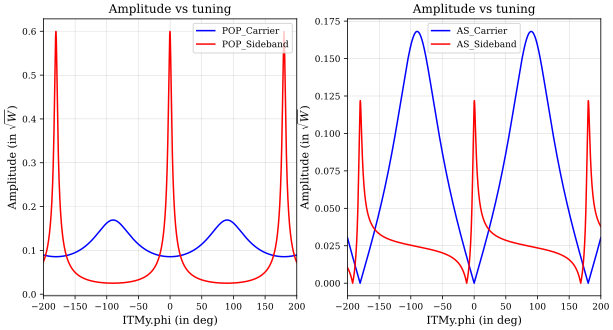

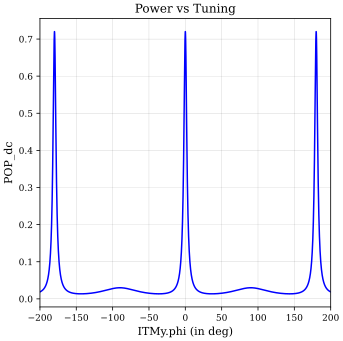

In [8]:
### Results
prmi.parse("xaxis(ITMy.phi,lin,-200,200,10000)")
out=prmi.run()

### Creating empty lists..

POP_f0=[]
POP_f2=[]
AS_f0=[]
AS_f2=[]
POP_dc=[]

phi=np.linspace(-200,200,10000)

### Appending the Amplitudes and Power..

for i in range(10000):
    POP_f0.append(abs(out["POP_f0"][i]))
    POP_f2.append(abs(out["POP_f2"][i]))
    AS_f0.append(abs(out["AS_f0"][i]))
    AS_f2.append(abs(out["AS_f2"][i]))
    POP_dc.append(abs(out["POP_dc"][i]))  
    
### Creating empty lists..
fig,a=plt.subplots(1,2,figsize=(10,5))
a[0].plot(phi,POP_f0,label="POP_Carrier")
a[0].plot(phi,POP_f2,label="POP_Sideband")
a[0].set_xlabel("ITMy.phi (in deg)")
a[0].set_ylabel("Amplitude (in $\sqrt{W}$)")
a[0].set_title("Amplitude vs tuning")
a[0].legend(loc="best")

a[1].plot(phi,AS_f0,label="AS_Carrier")
a[1].plot(phi,AS_f2,label="AS_Sideband")
a[1].set_xlabel("ITMy.phi (in deg)")
a[1].set_ylabel("Amplitude (in $\sqrt{W}$)")
a[1].set_title("Amplitude vs tuning")
a[1].legend(loc="best")

fig,plot=plt.subplots(1,figsize=(5,5))
plot.plot(phi,POP_dc)
plot.set_xlabel("ITMy.phi (in deg)")
plot.set_ylabel("POP_dc")
plot.set_title("Power vs Tuning")


fig.tight_layout()


<a name="section_6"></a>
## Problem_1

In the following cell, I locate the peaks of SB in the POP and AS ports to see if they occur simultaneously when the ITMy is swept.

In [9]:
import scipy 
from scipy import signal
peaks_POP_Sb,_=signal.find_peaks(POP_f2)
peaks_AS_Sb,_=signal.find_peaks(AS_f2)

phi_POP=phi[peaks_POP_Sb]
phi_AS=phi[peaks_AS_Sb]
print("SB is resonant at ITMy.phi:",phi_POP,"degrees")
print("\nMax trans to AS occurs at ITMy.phi:",phi_AS,"degrees")


power_buildup_1=max(POP_dc)
print(power_buildup_1,"W")

SB is resonant at ITMy.phi: [-180.2380238   -0.220022   179.7979798] degrees

Max trans to AS occurs at ITMy.phi: [-179.7179718    0.30003    180.3180318] degrees
0.7199908858503594 W


#### The peaks do not occur together. I am puzzled on this..<br>
#### But the peaks do occur together when PRM is swept, instead of ITMy

SB is resonant at ITMy.phi: [-1.80118012e+02 -1.00010001e-01  1.79917992e+02] degrees

Max trans to AS occurs at ITMy.phi: [-1.80118012e+02 -1.00010001e-01  1.79917992e+02] degrees


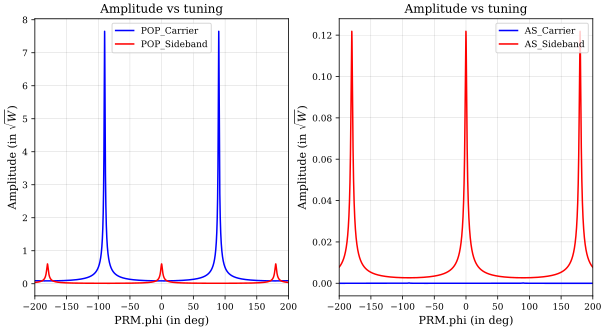

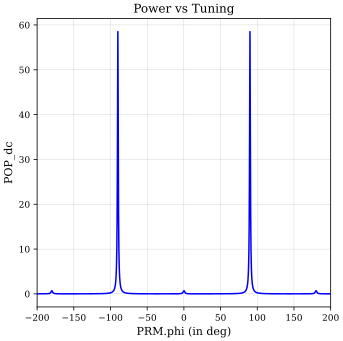

In [10]:
prmi.parse("xaxis(PRM.phi,lin,-200,200,10000)")
out=prmi.run()

POP_f0=[]
POP_f2=[]
AS_f0=[]
AS_f2=[]
POP_dc=[]

phi=np.linspace(-200,200,10000)

for i in range(10000):
    POP_f0.append(abs(out["POP_f0"][i]))
    POP_f2.append(abs(out["POP_f2"][i]))
    AS_f0.append(abs(out["AS_f0"][i]))
    AS_f2.append(abs(out["AS_f2"][i]))
    POP_dc.append(abs(out["POP_dc"][i]))  
    
fig,a=plt.subplots(1,2,figsize=(10,5))
a[0].plot(phi,POP_f0,label="POP_Carrier")
a[0].plot(phi,POP_f2,label="POP_Sideband")
a[0].set_xlabel("PRM.phi (in deg)")
a[0].set_ylabel("Amplitude (in $\sqrt{W}$)")
a[0].set_title("Amplitude vs tuning")
a[0].legend(loc="best")

a[1].plot(phi,AS_f0,label="AS_Carrier")
a[1].plot(phi,AS_f2,label="AS_Sideband")
a[1].set_xlabel("PRM.phi (in deg)")
a[1].set_ylabel("Amplitude (in $\sqrt{W}$)")
a[1].set_title("Amplitude vs tuning")
a[1].legend(loc="best")

fig,plot=plt.subplots(1,figsize=(5,5))
plot.plot(phi,POP_dc)
plot.set_xlabel("PRM.phi (in deg)")
plot.set_ylabel("POP_dc")
plot.set_title("Power vs Tuning")

fig.tight_layout()


import scipy 
from scipy import signal
peaks_POP_Sb,_=signal.find_peaks(POP_f2)
peaks_AS_Sb,_=signal.find_peaks(AS_f2)

phi_POP=phi[peaks_POP_Sb]
phi_AS=phi[peaks_AS_Sb]
print("SB is resonant at ITMy.phi:",phi_POP,"degrees")
print("\nMax trans to AS occurs at ITMy.phi:",phi_AS,"degrees")

#### The power in the PRC is maximum at phi ~ 90 deg but the resonance of SB will be lost !?

<a name="section_7"></a>
# Optimizing the Reflectance

In the following cell, I create a model to optimize the reflectance of the PRM to get maximum power buildup in the PRC.<br>
I do that by scanning the R value of PRM and probing the POP_dc output.<br>
Basically, I am impedance matching the Michelson and the PRM.

R_opt: 0.941986192469247


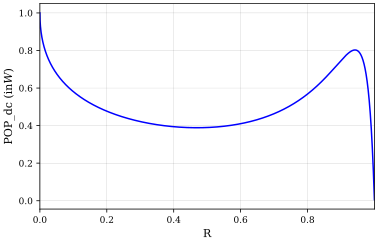

In [71]:
### I have assumed that the PRM's loss is constant at 8.5E-6.

### I have used the optimized PRC parameters which sees a dark AS port for carrier.

prmi2=finesse.Model()
prmi2.parse("""
var R 0                                         ### Defining a variable R, which is later swept

#Laser
l laser P=1
s s0 laser.p1 eom1.p1 L=1

#EOMS
mod eom1  f=9099471 midx=0 order=1
s s1 eom1.p2 eom2.p1 L=1
mod eom2  f=45497355 midx=0.3 order=1
s s2 eom2.p2 Fi.p1 L=1

#Faraday isolator
dbs Fi
s s3 Fi.p3 prmar.p1 L=0

#PRM

m prmar R=0 T=0.99996 L=4e-5 Rc=[11.009, 11.009]
s sprmarpr prmar.p2 PRM.p1 L=0.0737 nr=1.4496 
m PRM R=R T=1-R-8.5e-6 L=8.5e-06                ### Setting the variable to R and T parameters
s sPRBS PRM.p2 BS.p1 L=6.6938325585217555                         

#Beam Splitter
bs BS R=0.5 T=0.4999625 L=3.75e-05 alpha=45 
s sBSAR1 BS.p3 BSAR1.p1 L=0.0687 nr=1.4496
bs BSAR1 R=5e-5 T=0.99995 L=0 phi=0 alpha=-29.195
s sBSAR2 BS.p4 BSAR2.p1 L=0.0687 nr=1.4496
bs BSAR2 R=5e-5 T=0.99995 L=0 phi=0 alpha=29.195


#ITMx
s michx BSAR1.p3 ITMxAR.p1 L=4.5582022909315505                         
m ITMxAR R=0 T=0.99998 L=2e-5
s sITMxARITM ITMxAR.p2 ITMx.p1 L=0.2 nr=1.4496
m ITMx R=0.9859625  T=0.014 L=3.75e-05 Rc=[-1934.0, -1934.0]

#ITMy
s michy BS.p2 ITMyAR.p1 L=4.4417977090684495                          
m ITMyAR R=0 T=0.99998 L=2e-5
s sITMyARITM ITMyAR.p2 ITMy.p1 L=0.2 nr=1.4496
m ITMy R=0.9859625  T=0.014 L=3.75e-05 Rc=[-1934.0, -1934.0]


pd POP_dc PRM.p2.o

xaxis(R,lin,0,1-8.5e-6,10000)                     ### Scanning the variable R from 0 to 1-8.5e-6

""")
out=prmi2.run()
POP_dc=[]
for i in range(10000):
    POP_dc.append(out["POP_dc"][i])
R=np.linspace(0,1-8.5e-6,10000)
plt.plot(R,POP_dc)
plt.xlabel("R")
plt.ylabel("POP_dc (in$W$)")
import scipy 
from scipy import signal
peak,_=signal.find_peaks(POP_dc)
R_opt=R[peak[0]]
print("R_opt:",R_opt)              ### R=0 can not be used!

Plotting the new results.

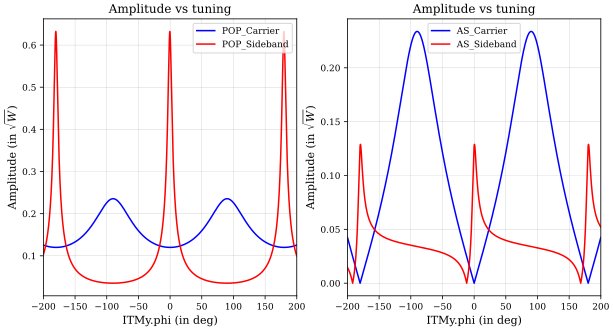

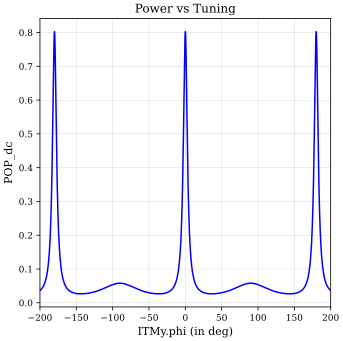

In [72]:
prmi3=prmi.deepcopy()
prmi3.PRM.R=R_opt
prmi3.PRM.T=1-8.5e-6-R_opt
prmi3.eom.midx=0.3
prmi3.parse("xaxis(ITMy.phi,lin,-200,200,10000)")
out=prmi3.run()

POP_f0=[]
POP_f2=[]
AS_f0=[]
AS_f2=[]
POP_dc=[]

phi=np.linspace(-200,200,10000)


for i in range(10000):
    POP_f0.append(abs(out["POP_f0"][i]))
    POP_f2.append(abs(out["POP_f2"][i]))
    AS_f0.append(abs(out["AS_f0"][i]))
    AS_f2.append(abs(out["AS_f2"][i]))
    POP_dc.append(abs(out["POP_dc"][i]))   

fig,a=plt.subplots(1,2,figsize=(10,5))
a[0].plot(phi,POP_f0,label="POP_Carrier")
a[0].plot(phi,POP_f2,label="POP_Sideband")
a[0].set_xlabel("ITMy.phi (in deg)")
a[0].set_ylabel("Amplitude (in $\sqrt{W}$)")
a[0].set_title("Amplitude vs tuning")
a[0].legend(loc="best")

a[1].plot(phi,AS_f0,label="AS_Carrier")
a[1].plot(phi,AS_f2,label="AS_Sideband")
a[1].set_xlabel("ITMy.phi (in deg)")
a[1].set_ylabel("Amplitude (in $\sqrt{W}$)")
a[1].set_title("Amplitude vs tuning")
a[1].legend(loc="best")

fig,plot=plt.subplots(1,figsize=(5,5))
plot.plot(phi,POP_dc)
plot.set_xlabel("ITMy.phi (in deg)")
plot.set_ylabel("POP_dc")
plot.set_title("Power vs Tuning")
fig.tight_layout()

Checking the increase of power in the PRC after optimizing the R of PRM.

In [73]:
power_buildup_2=max(POP_dc)
increase=power_buildup_2-power_buildup_1
print(increase,"W")

0.08274848524403433 W


midx_opt: 0.5500550055005501


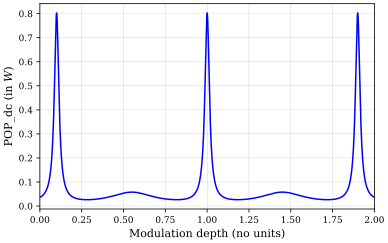

In [74]:
prmi3.parse("xaxis(eom.midx,lin,0,2,10000)")
POP_dc=[]
midx=np.linspace(0,2,10000)
for i in range(10000):
    POP_dc.append(out["POP_dc"][i])
plt.plot(midx,POP_dc)
plt.xlabel("Modulation depth (no units)")
plt.ylabel("POP_dc (in $W$)")
import scipy
from scipy import signal

peaks,_=signal.find_peaks(POP_dc)
midx_opt=midx[peaks[1]]
print("midx_opt:",midx_opt)


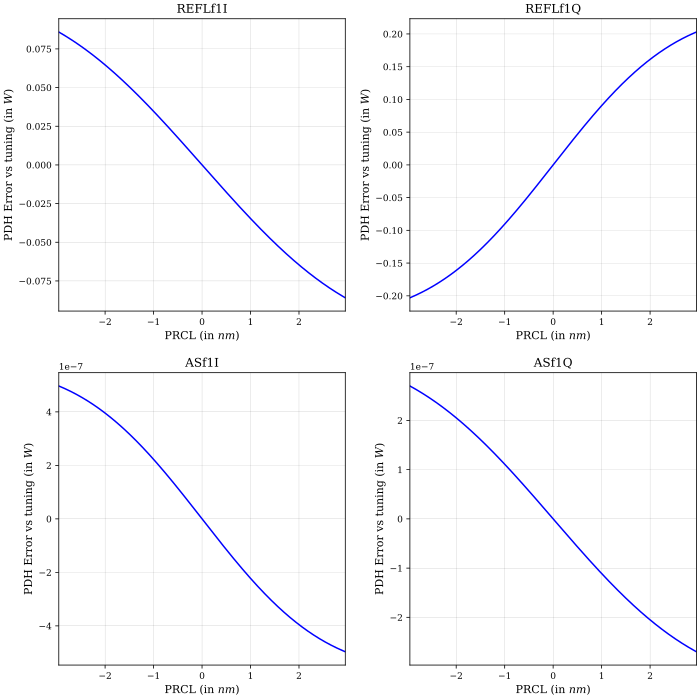

In [78]:
prmi.PRM.R=prmi3.PRM.R
prmi.PRM.T=prmi3.PRM.T
prmi.eom.midx=midx_opt

prmi.parse("xaxis(PRM.phi,lin,-1,1,10000)")
REFLf1I=[]
REFLf1Q=[]
ASf1I=[]
ASf1Q=[]

lim=1*1064/360
prcl=np.linspace(-lim,lim,10000)
out=prmi.run()

import matplotlib.pyplot as plt
for i in range(10000):
    REFLf1I.append(out["REFLf1I"][i])
    ASf1I.append(out["ASf1I"][i])
    REFLf1Q.append(out["REFLf1Q"][i])
    ASf1Q.append(out["ASf1Q"][i])

fig,plots=plt.subplots(2,2,figsize=(10,10),sharex=False)

plots[0,0].plot(prcl,REFLf1I)
plots[0,0].set_title("REFLf1I")
plots[0,0].set_ylabel("PDH Error vs tuning (in $W$)")
plots[0,0].set_xlabel("PRCL (in $nm$)")

plots[1,0].plot(prcl,ASf1I)
plots[1,0].set_title("ASf1I")
plots[1,0].set_ylabel("PDH Error vs tuning (in $W$)")
plots[1,0].set_xlabel("PRCL (in $nm$)")

plots[0,1].plot(prcl,REFLf1Q)
plots[0,1].set_title("REFLf1Q")
plots[0,1].set_ylabel("PDH Error vs tuning (in $W$)")
plots[0,1].set_xlabel("PRCL (in $nm$)")

plots[1,1].plot(prcl,ASf1Q)
plots[1,1].set_title("ASf1Q")
plots[1,1].set_ylabel("PDH Error vs tuning (in $W$)")
plots[1,1].set_xlabel("PRCL (in $nm$)")

fig.tight_layout()
  


In [93]:
s_REFLf1I,_=np.polyfit(prcl*1e-9,REFLf1I,1)
s_REFLf1Q,_=np.polyfit(prcl*1e-9,REFLf1Q,1)
s_ASf1I,_=np.polyfit(prcl*1e-9,ASf1I,1)
s_ASf1Q,_=np.polyfit(prcl*1e-9,ASf1Q,1)
print("slope_REFLf1I: ",abs(s_REFLf1I))
print("slope_REFLf1Q: ",abs(s_REFLf1Q))
print("slope_ASf1I: ",abs(s_ASf1I))
print("slope_ASf1Q: ",abs(s_ASf1Q))

slope_REFLf1I:  31475149.433490075
slope_REFLf1Q:  77602731.98759362
slope_ASf1I:  190.27099210303848
slope_ASf1Q:  99.68978227522858
